In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
penguin_url = 'https://raw.githubusercontent.com/gaurav9909/Machine_Learning_Projects/main/penguin_data/penguins.csv'
df = pd.read_csv(penguin_url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.shape

(344, 8)

In [4]:
pip install ydata-profiling

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file('pandas_profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [7]:
for col in df.select_dtypes(include=['object']).columns:
  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
df['sex'].value_counts()

,count
sex,
male,179
female,165


In [9]:
pip install datacleaner

In [10]:
from datacleaner import autoclean
df = autoclean(df)

In [11]:
df.shape

(344, 8)

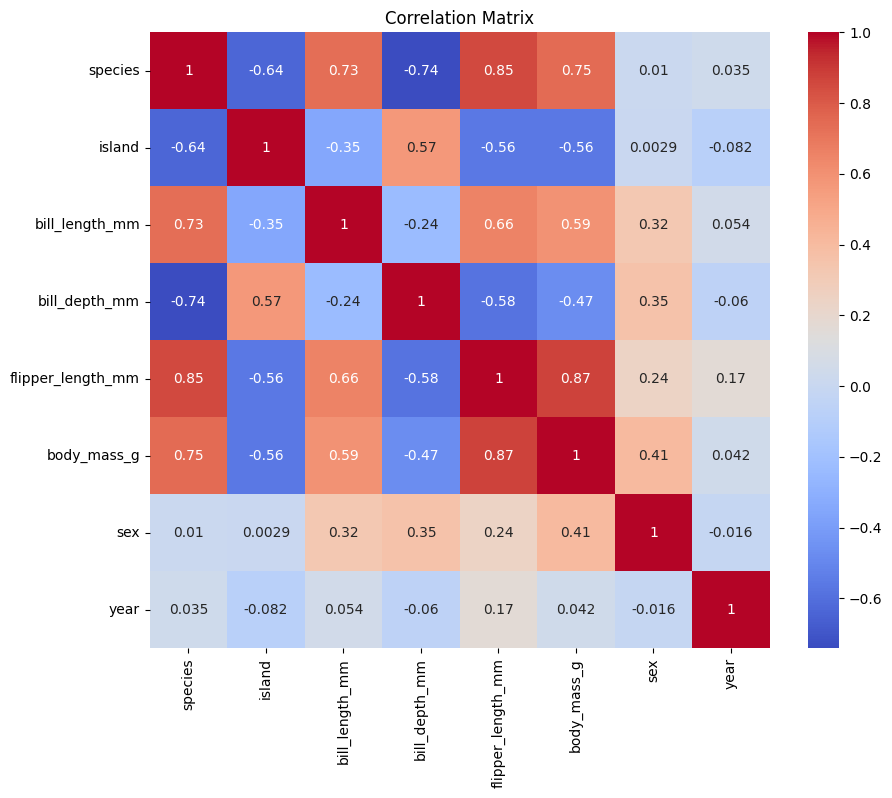

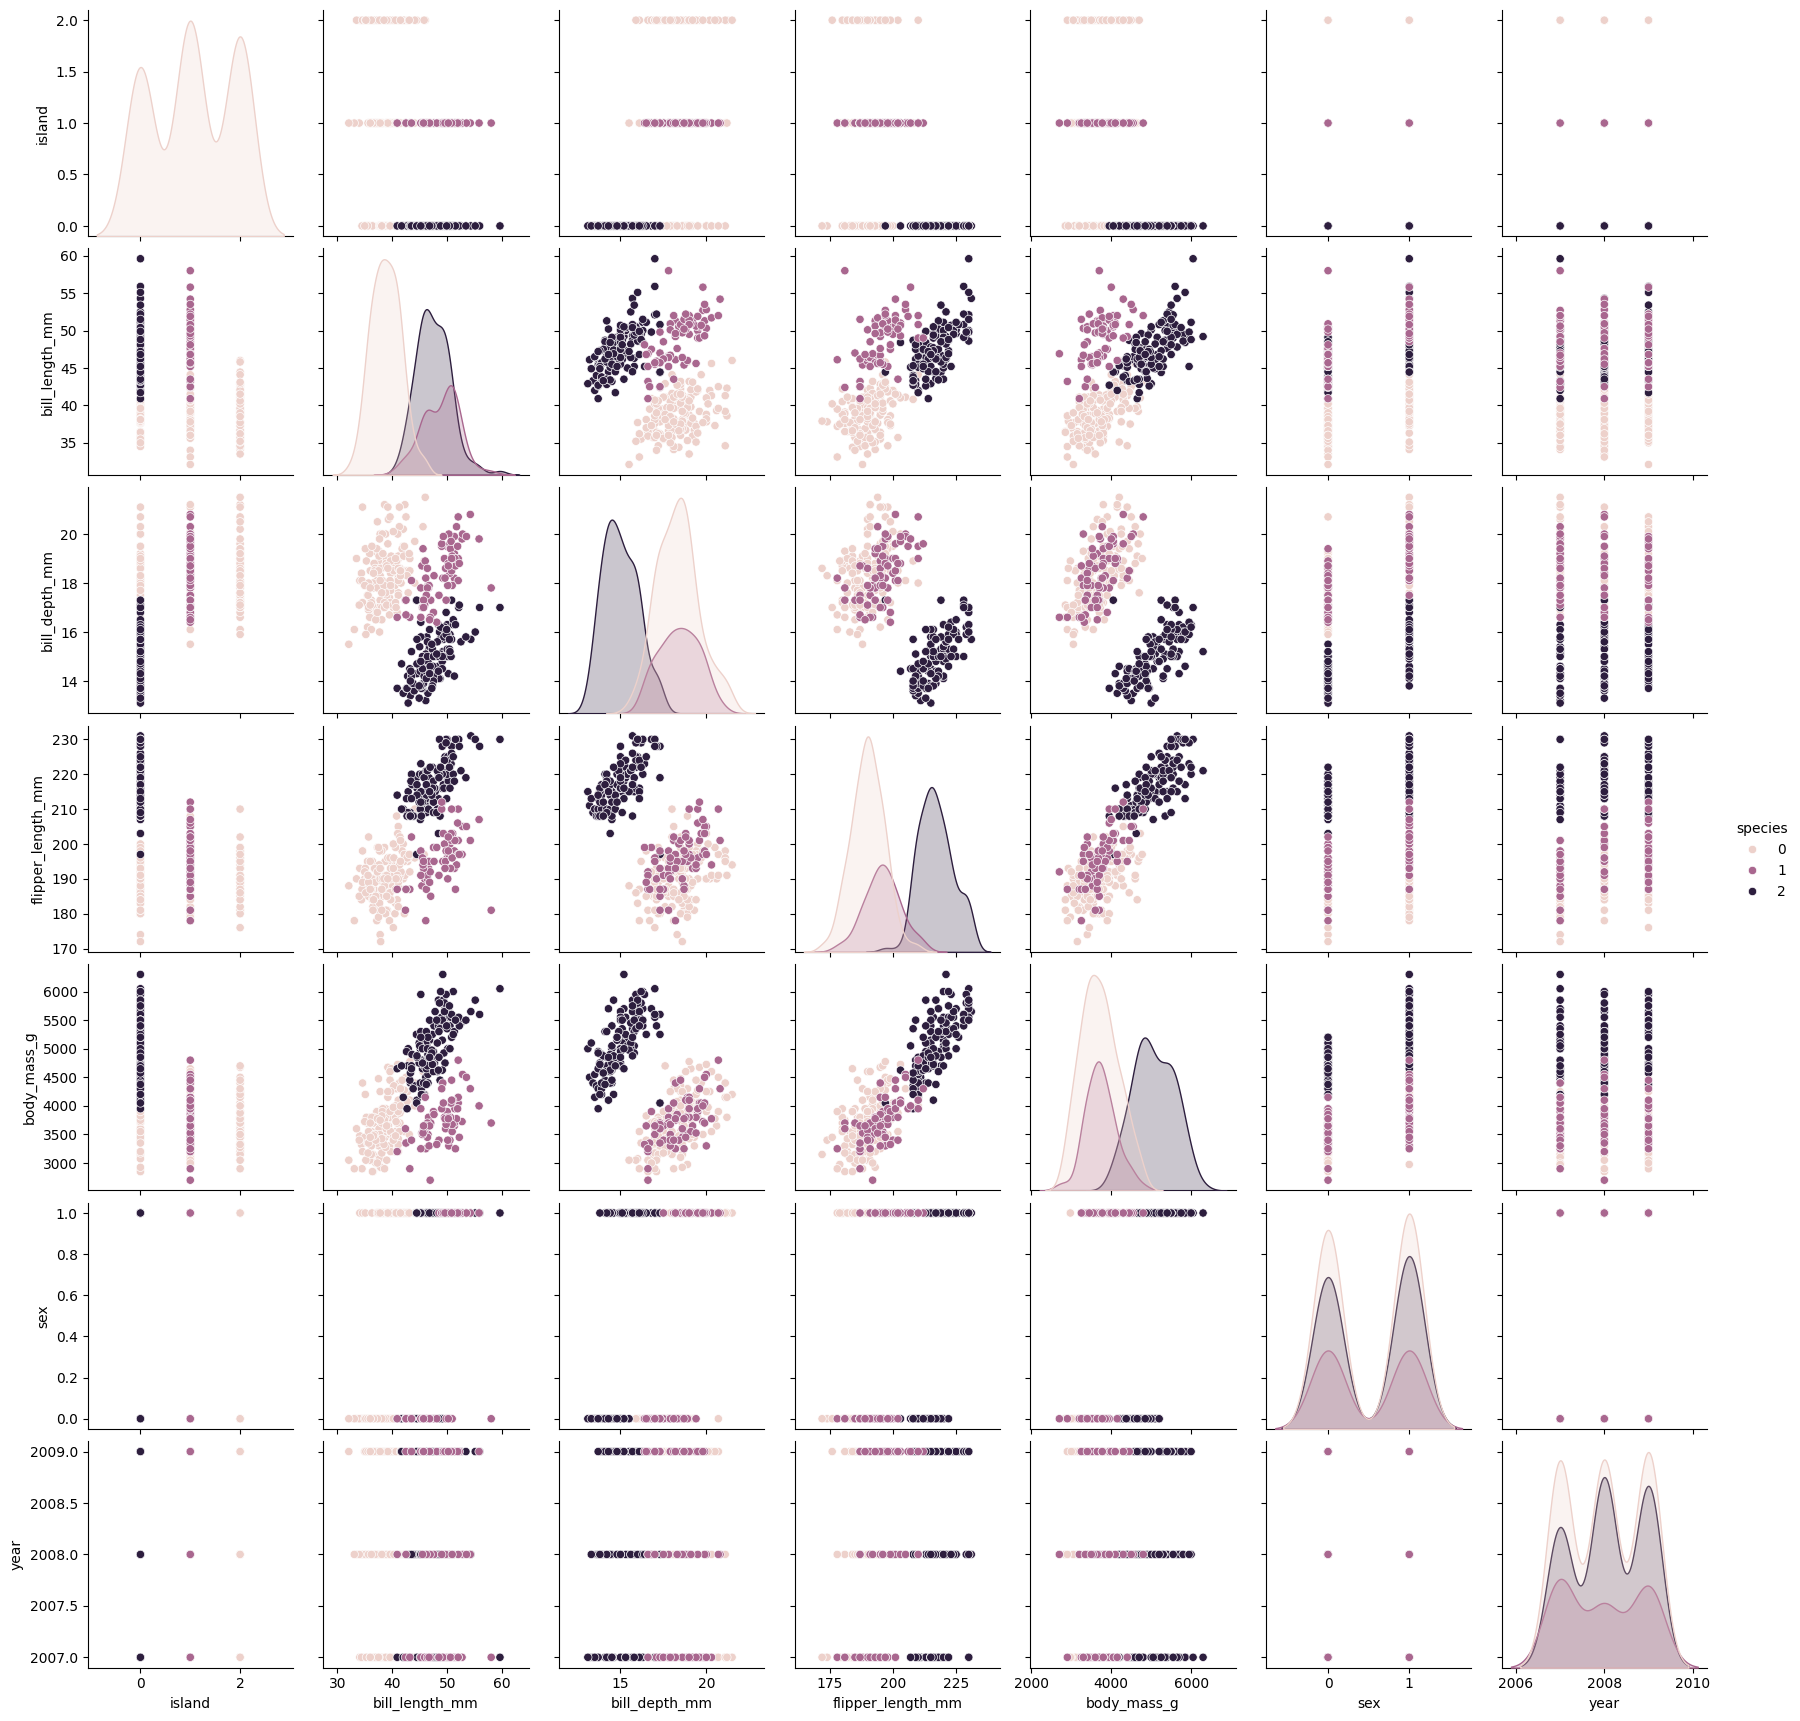

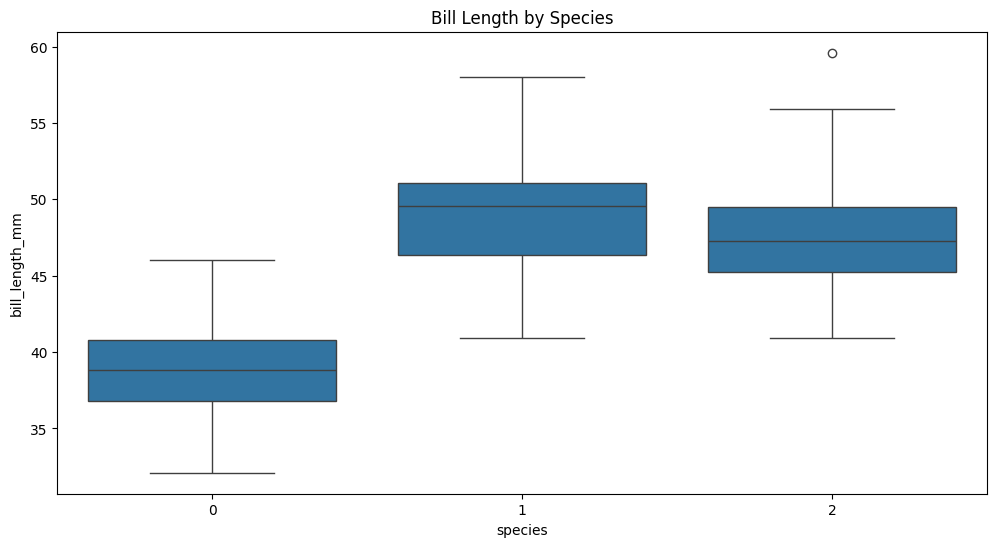

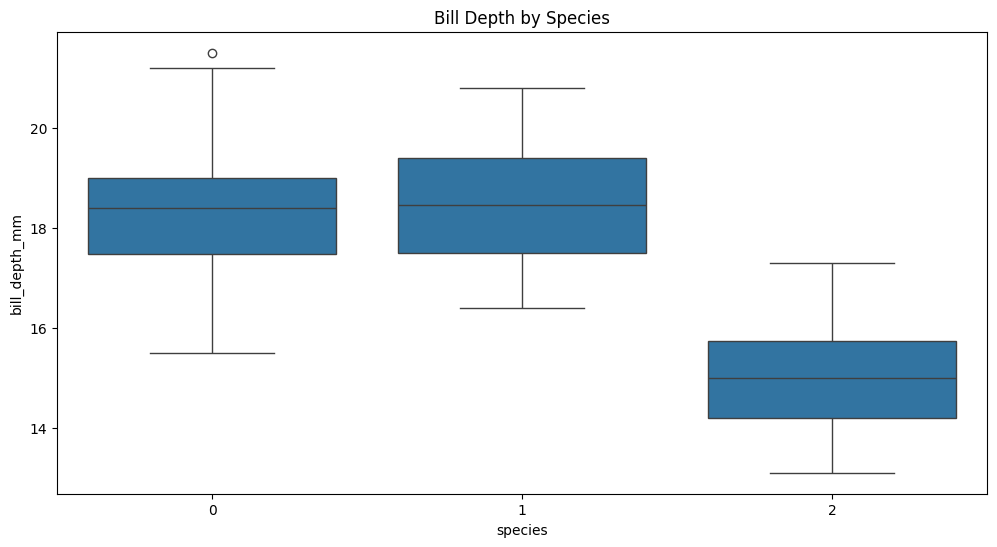

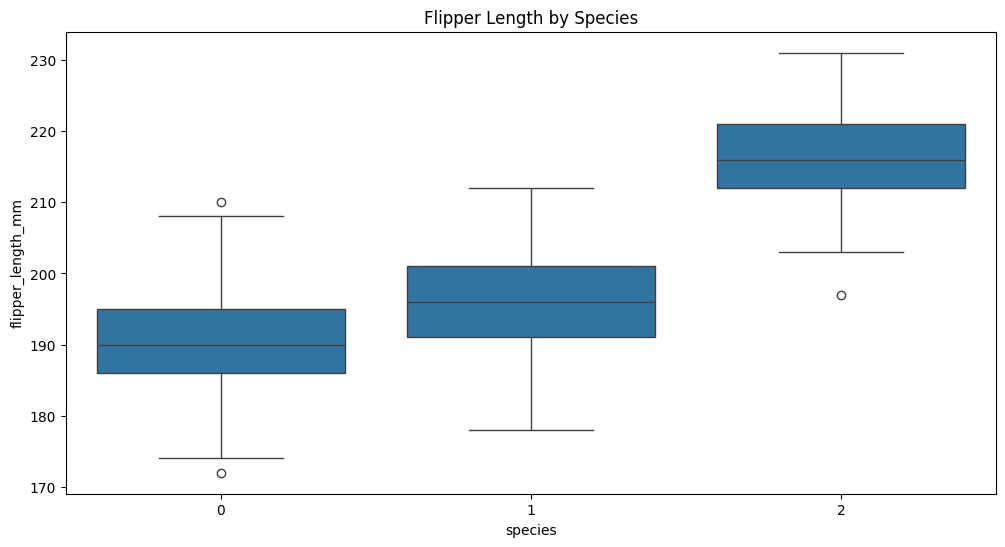

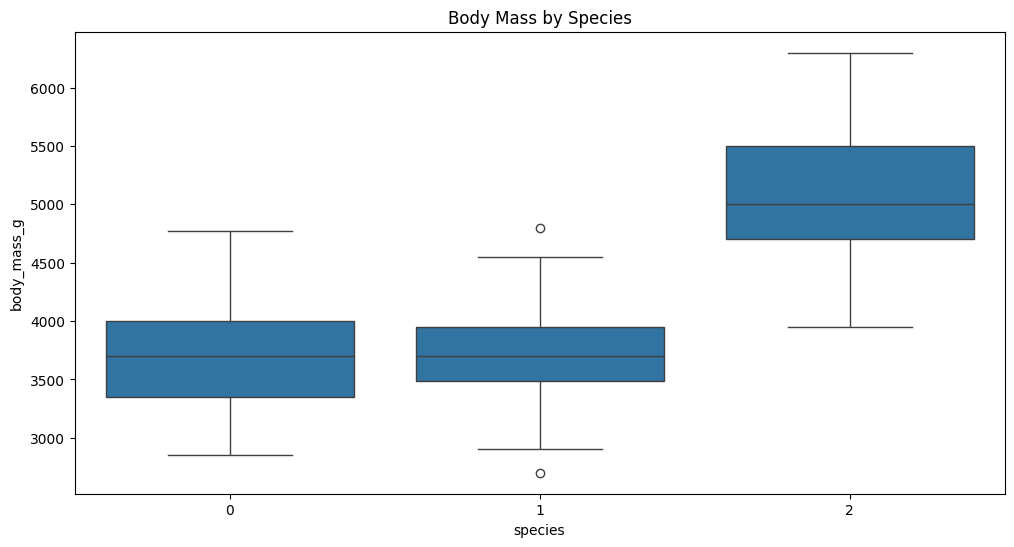

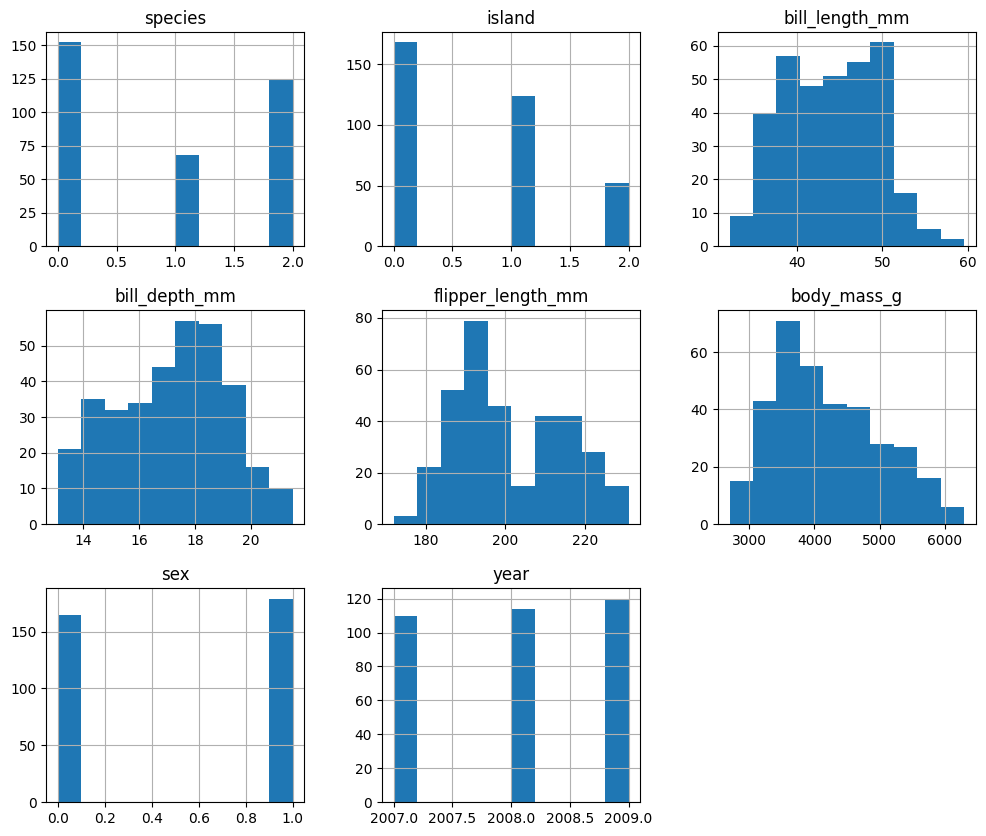

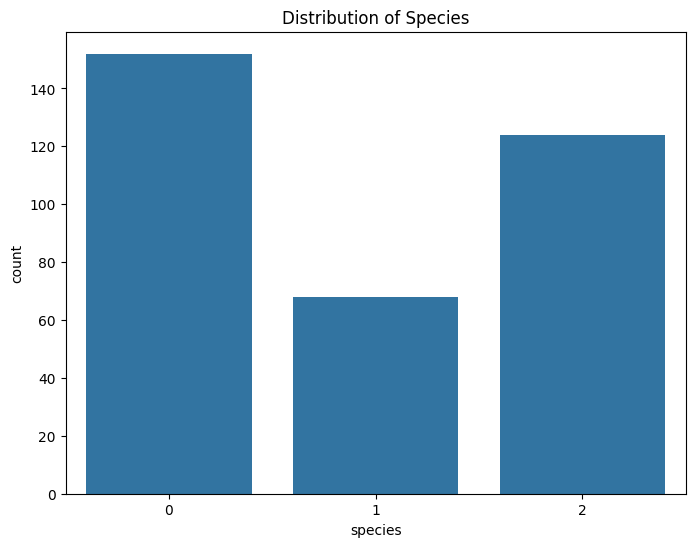

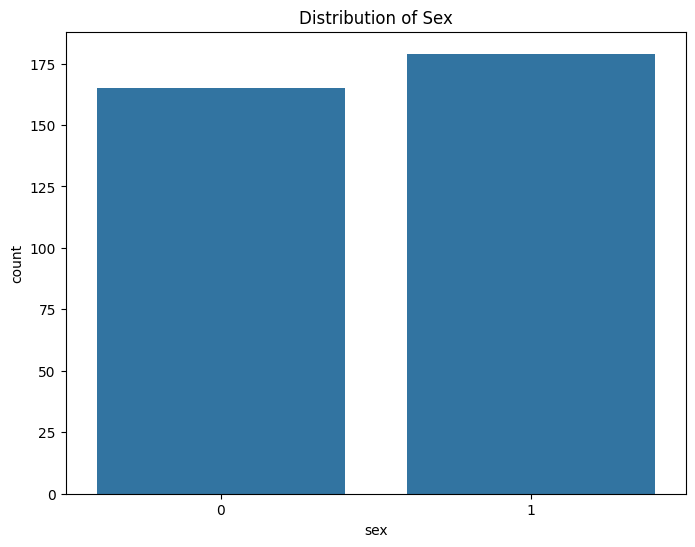

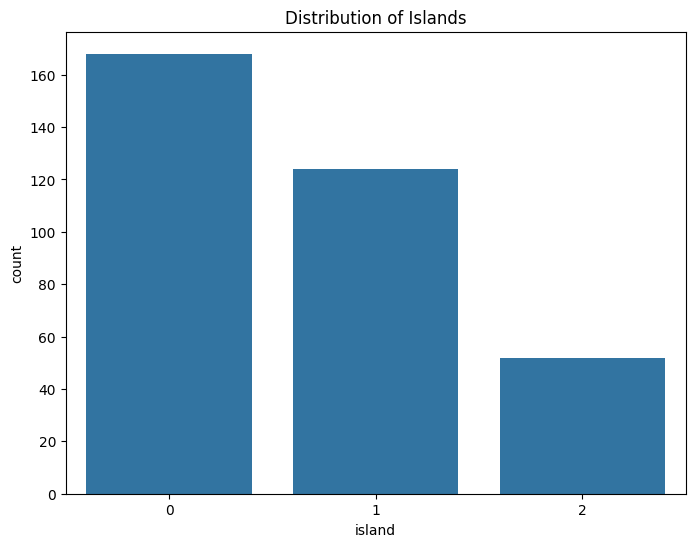

In [12]:

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.show()

# Box plots for numerical features by species
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Bill Length by Species')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Bill Depth by Species')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Flipper Length by Species')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Body Mass by Species')
plt.show()

# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.show()

# Count plots for categorical features
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='island', data=df)
plt.title('Distribution of Islands')
plt.show()


<Axes: xlabel='species', ylabel='bill_length_mm'>

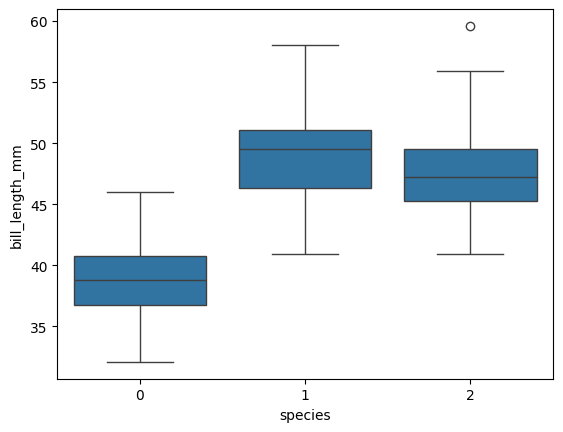

In [13]:
sns.boxplot(x='species', y='bill_length_mm', data=df)

In [14]:
# Calculate the IQR for each numerical feature
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [15]:
df.shape

(344, 8)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()


df['sex'] = le.fit_transform(df['sex'])
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])
df['species'] = le.fit_transform(df['species'])


In [17]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.10,18.7,181.0,3750.0,1,2007
1,0,2,39.50,17.4,186.0,3800.0,0,2007
2,0,2,40.30,18.0,195.0,3250.0,0,2007
3,0,2,44.45,17.3,197.0,4050.0,1,2007
4,0,2,36.70,19.3,193.0,3450.0,0,2007
...,...,...,...,...,...,...,...,...
339,1,1,55.80,19.8,207.0,4000.0,1,2009
340,1,1,43.50,18.1,202.0,3400.0,0,2009
341,1,1,49.60,18.2,193.0,3775.0,1,2009
342,1,1,50.80,19.0,210.0,4100.0,1,2009


In [18]:
X = df.drop(['year','island','species','sex'], axis=1)
y = df['species']


In [19]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,55.80,19.8,207.0,4000.0
340,43.50,18.1,202.0,3400.0
341,49.60,18.2,193.0,3775.0
342,50.80,19.0,210.0,4100.0


In [20]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
339,1
340,1
341,1
342,1


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
X= scaler.fit_transform(X)

# Check the scaled data
print(X)


[[0.25454545 0.66666667 0.15254237 0.29166667]
 [0.26909091 0.51190476 0.23728814 0.30555556]
 [0.29818182 0.58333333 0.38983051 0.15277778]
 ...
 [0.63636364 0.60714286 0.3559322  0.29861111]
 [0.68       0.70238095 0.6440678  0.38888889]
 [0.65818182 0.66666667 0.44067797 0.29861111]]


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
species,344.0,0.918605,0.893320,0.0,0.000,1.00,2.0,2.0
island,344.0,0.662791,0.726194,0.0,0.000,1.00,1.0,2.0
bill_length_mm,344.0,43.925000,5.443792,32.1,39.275,44.45,48.5,59.6
bill_depth_mm,344.0,17.152035,1.969060,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,344.0,200.892442,14.023826,172.0,190.000,197.00,213.0,231.0
body_mass_g,344.0,4200.872093,799.696532,2700.0,3550.000,4050.00,4750.0,6300.0
sex,344.0,0.520349,0.500313,0.0,0.000,1.00,1.0,1.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


In [23]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [24]:
df['species'].value_counts()

,count
species,
0,152
2,124
1,68


In [25]:
df.skew()

,0
species,0.160529
island,0.613949
bill_length_mm,0.051571
bill_depth_mm,-0.145196
flipper_length_mm,0.351218
body_mass_g,0.474832
sex,-0.081820
year,-0.053728


In [26]:
X = df.drop(['year','island','species','sex'], axis=1)
y = df['species']

In [27]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0


In [28]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(X_train,y_train)
    pred= RFR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"at random_state ",maxRS)

best accuracy is  1.0 at random_state  17


In [31]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
predRFC = RFC.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predRFC))
print("Confusion metrics :- ",confusion_matrix(y_test,predRFC))
print("Classification report :- \n",classification_report(y_test,predRFC))
print('/n')
metric_value = accuracy_score(y_test,predRFC) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9711538461538461
Confusion metrics :-  [[39  1  0]
 [ 1 18  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.95      0.95      0.95        19
           2       1.00      0.98      0.99        45

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

/n


In [32]:
svc = SVC()
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predsvc))
print("Confusion metrics :- ",confusion_matrix(y_test,predsvc))
print("Classification report :- \n",classification_report(y_test,predsvc))
print('/n')
metric_value = accuracy_score(y_test,predsvc) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.75
Confusion metrics :-  [[38  0  2]
 [18  0  1]
 [ 5  0 40]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.62      0.95      0.75        40
           1       0.00      0.00      0.00        19
           2       0.93      0.89      0.91        45

    accuracy                           0.75       104
   macro avg       0.52      0.61      0.55       104
weighted avg       0.64      0.75      0.68       104

/n


In [33]:
log = LogisticRegression()
log.fit(X_train,y_train)
predlog = log.predict(X_test)
print("Accuracy score :-",accuracy_score(y_test,predlog))
print("Confusion metrics :- ",confusion_matrix(y_test,predlog))
print("Classification report :- \n",classification_report(y_test,predlog))
print('/n')
metric_value = accuracy_score(y_test,predlog) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :- 0.9711538461538461
Confusion metrics :-  [[40  0  0]
 [ 2 17  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.89      0.94        19
           2       1.00      0.98      0.99        45

    accuracy                           0.97       104
   macro avg       0.98      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104

/n


In [34]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
predgb = gb.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predgb))
print("Confusion metrics :- ",confusion_matrix(y_test,predgb))
print("Classification report :- \n",classification_report(y_test,predgb))
print('/n')
metric_value = accuracy_score(y_test,predgb) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9711538461538461
Confusion metrics :-  [[39  0  1]
 [ 1 18  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.95      0.97        19
           2       0.98      0.98      0.98        45

    accuracy                           0.97       104
   macro avg       0.98      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

/n


In [35]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predab = ab.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predab))
print("Confusion metrics :- ",confusion_matrix(y_test,predab))
print("Classification report :- \n",classification_report(y_test,predab))
print('/n')
metric_value = accuracy_score(y_test,predab) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9134615384615384
Confusion metrics :-  [[35  4  1]
 [ 2 16  1]
 [ 0  1 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.76      0.84      0.80        19
           2       0.96      0.98      0.97        45

    accuracy                           0.91       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.92      0.91      0.91       104

/n


In [36]:
bg = BaggingClassifier()
bg.fit(X_train,y_train)
predbg = bg.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predbg))
print("Confusion metrics :- ",confusion_matrix(y_test,predbg))
print("Classification report :- \n",classification_report(y_test,predbg))
print('/n')
metric_value = accuracy_score(y_test,predbg) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9615384615384616
Confusion metrics :-  [[39  0  1]
 [ 2 17  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       1.00      0.89      0.94        19
           2       0.98      0.98      0.98        45

    accuracy                           0.96       104
   macro avg       0.97      0.95      0.96       104
weighted avg       0.96      0.96      0.96       104

/n


In [37]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
predet = et.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predet))
print("Confusion metrics :- ",confusion_matrix(y_test,predet))
print("Classification report :- \n",classification_report(y_test,predet))
print('/n')
metric_value = accuracy_score(y_test,predet) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9615384615384616
Confusion metrics :-  [[39  0  1]
 [ 2 17  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       1.00      0.89      0.94        19
           2       0.98      0.98      0.98        45

    accuracy                           0.96       104
   macro avg       0.97      0.95      0.96       104
weighted avg       0.96      0.96      0.96       104

/n


In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predDT = DT.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predDT))
print("Confusion metrics :- ",confusion_matrix(y_test,predDT))
print("Classification report :- \n",classification_report(y_test,predDT))
print('/n')
metric_value = accuracy_score(y_test,predDT) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9615384615384616
Confusion metrics :-  [[40  0  0]
 [ 2 16  1]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.84      0.91        19
           2       0.98      0.98      0.98        45

    accuracy                           0.96       104
   macro avg       0.97      0.94      0.95       104
weighted avg       0.96      0.96      0.96       104

/n


In [39]:
ET = ExtraTreeClassifier()
ET.fit(X_train,y_train)
predET = ET.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predET))
print("Confusion metrics :- ",confusion_matrix(y_test,predET))
print("Classification report :-  \n",classification_report(y_test,predET))
print('/n')
metric_value = accuracy_score(y_test,predET) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9230769230769231
Confusion metrics :-  [[36  4  0]
 [ 3 16  0]
 [ 1  0 44]]
Classification report :-  
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.80      0.84      0.82        19
           2       1.00      0.98      0.99        45

    accuracy                           0.92       104
   macro avg       0.90      0.91      0.90       104
weighted avg       0.93      0.92      0.92       104

/n


In [40]:
KNN = KNN()
KNN.fit(X_train,y_train)
predKNN = KNN.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predKNN))
print("Confusion metrics :- ",confusion_matrix(y_test,predKNN))
print("Classification report :- \n",classification_report(y_test,predKNN))
print('/n')
metric_value = accuracy_score(y_test,predKNN) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.7596153846153846
Confusion metrics :-  [[33  7  0]
 [12  6  1]
 [ 4  1 40]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74        40
           1       0.43      0.32      0.36        19
           2       0.98      0.89      0.93        45

    accuracy                           0.76       104
   macro avg       0.69      0.68      0.68       104
weighted avg       0.76      0.76      0.75       104

/n


In [41]:
NBG = GaussianNB()
NBG.fit(X_train,y_train)
predNBG = NBG.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predNBG))
print("Confusion metrics:- ",confusion_matrix(y_test,predNBG))
print("Classification report :- \n",classification_report(y_test,predNBG))
print('/n')
metric_value = accuracy_score(y_test,predNBG) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9711538461538461
Confusion metrics:-  [[39  1  0]
 [ 1 18  0]
 [ 0  1 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.90      0.95      0.92        19
           2       1.00      0.98      0.99        45

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.96       104
weighted avg       0.97      0.97      0.97       104

/n


In [42]:
NBB = BernoulliNB()
NBB.fit(X_train,y_train)
predNBB = NBB.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predNBB))
print("Confusion metrics :- ",confusion_matrix(y_test,predNBB))
print("Classification report :- \n",classification_report(y_test,predNBB))
print('/n')
metric_value = accuracy_score(y_test,predNBB) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.38461538461538464
Confusion metrics :-  [[40  0  0]
 [19  0  0]
 [45  0  0]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.38      1.00      0.56        40
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        45

    accuracy                           0.38       104
   macro avg       0.13      0.33      0.19       104
weighted avg       0.15      0.38      0.21       104

/n


In [43]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
predXGB = XGB.predict(X_test)
print("Accuracy score :- ",accuracy_score(y_test,predXGB))
print("Confusion metrics :- ",confusion_matrix(y_test,predXGB))
print("Classification report :- \n",classification_report(y_test,predXGB))
print('/n')
metric_value = accuracy_score(y_test,predXGB) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()

Accuracy score :-  0.9711538461538461
Confusion metrics :-  [[39  0  1]
 [ 1 18  0]
 [ 1  0 44]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.95      0.97        19
           2       0.98      0.98      0.98        45

    accuracy                           0.97       104
   macro avg       0.98      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

/n


In [44]:
# cross validation of random forest classifier
score = cross_val_score(RFC,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predRFC)-score.mean())

[0.98550725 0.98550725 0.97101449 0.97101449 0.95588235]
score is :-  0.9737851662404091
difference between Accuracy score and cross validation score is  =  -0.0026313200865629716


In [45]:
# cv of logistic regression
score = cross_val_score(log,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predlog)-score.mean())

[0.98550725 0.98550725 0.97101449 1.         0.97058824]
score is :-  0.9825234441602728
difference between Accuracy score and cross validation score is  =  -0.011369598006426673


In [46]:
# cv of support vector machine
score = cross_val_score(svc,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predsvc)-score.mean())

[0.72463768 0.66666667 0.73913043 0.73913043 0.76470588]
score is :-  0.726854219948849
difference between Accuracy score and cross validation score is  =  0.023145780051150977


In [47]:
# cv of bagging classifier
score = cross_val_score(bg,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predbg)-score.mean())

[0.95652174 0.98550725 0.97101449 0.97101449 0.95588235]
score is :-  0.9679880647911338
difference between Accuracy score and cross validation score is  =  -0.006449603252672187


In [48]:
# cv of adaboosting classifier
score = cross_val_score(ab,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predab)-score.mean())

[0.92753623 0.7826087  0.86956522 0.8115942  0.77941176]
score is :-  0.8341432225063938
difference between Accuracy score and cross validation score is  =  0.0793183159551446


In [49]:
# cv of ExtraTreesClassifier
score = cross_val_score(et,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predet)-score.mean())

[0.95652174 0.98550725 0.97101449 1.         0.97058824]
score is :-  0.9767263427109973
difference between Accuracy score and cross validation score is  =  -0.015187881172535778


In [50]:
# cv of gradient boost classifier
score = cross_val_score(gb,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predgb)-score.mean())

[0.95652174 1.         0.95652174 1.         0.95588235]
score is :-  0.9737851662404091
difference between Accuracy score and cross validation score is  =  -0.0026313200865629716


In [51]:
# cv of decision tree
score = cross_val_score(DT,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predDT)-score.mean())

[0.95652174 0.95652174 0.94202899 0.97101449 0.92647059]
score is :-  0.9505115089514067
difference between Accuracy score and cross validation score is  =  0.011026952587054883


In [52]:
# cv of extratree classifier
score = cross_val_score(ET,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predET)-score.mean())

[0.94202899 0.88405797 0.94202899 0.89855072 0.95588235]
score is :-  0.9245098039215686
difference between Accuracy score and cross validation score is  =  -0.0014328808446454344


In [53]:
# cv of knn classifier
score = cross_val_score(KNN,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predKNN)-score.mean())

[0.72463768 0.73913043 0.73913043 0.84057971 0.89705882]
score is :-  0.7881074168797955
difference between Accuracy score and cross validation score is  =  -0.028492032264410883


In [54]:
# cv of naive bayes gaussian
score = cross_val_score(NBG,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predNBG)-score.mean())

[0.97101449 0.95652174 0.95652174 0.97101449 0.97058824]
score is :-  0.9651321398124468
difference between Accuracy score and cross validation score is  =  0.006021706341399313


In [55]:
# cv of naive bayes Bernoulli
score = cross_val_score(NBB,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predNBB)-score.mean())

[0.44927536 0.44927536 0.43478261 0.43478261 0.44117647]
score is :-  0.4418584825234442
difference between Accuracy score and cross validation score is  =  -0.05724309790805954


In [56]:
# cv of XGB
score = cross_val_score(XGB,X,y)
print(score)
print("score is :- ",score.mean())
print("difference between Accuracy score and cross validation score is  = ",accuracy_score(y_test,predXGB)-score.mean())

[0.97101449 0.98550725 0.95652174 1.         0.97058824]
score is :-  0.9767263427109973
difference between Accuracy score and cross validation score is  =  -0.005572496557151196


In [57]:
from sklearn.model_selection import GridSearchCV

parameter = {'criterion': ['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [58]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [59]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [60]:
GCV.best_estimator_

ExtraTreesClassifier(max_depth=20, n_estimators=50, n_jobs=-2, random_state=10)

In [61]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [62]:
GCV_pred=GCV.best_estimator_.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.9615384615384616

<Axes: >

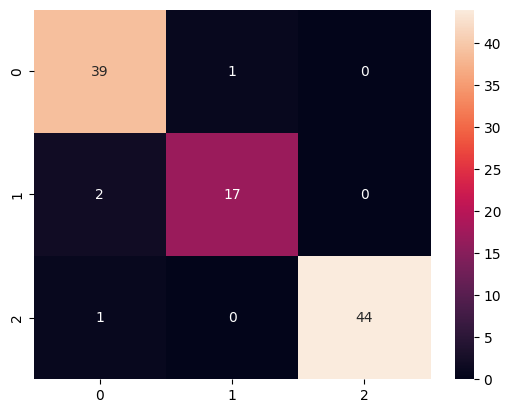

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,GCV_pred)
sns.heatmap(confusion_matrix(y_test,GCV_pred),annot=True, fmt='d')

In [64]:
import plotly.graph_objects as go
print('/n')
metric_value = accuracy_score(y_test,GCV_pred) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()


/n
